In [12]:
# imports
import numpy as np
import math
from matplotlib import cm
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

### Covariance Matrix Generator

In [13]:
'''
Function that declares a random covariance matrix with
self variance between 0 and 10
'''

def cov_matrix_gen():
    cov_rand = 10*np.random.rand(3)
    cov_matrix = np.diag(cov_rand)
    return cov_matrix

### Genarating and Plotting Data

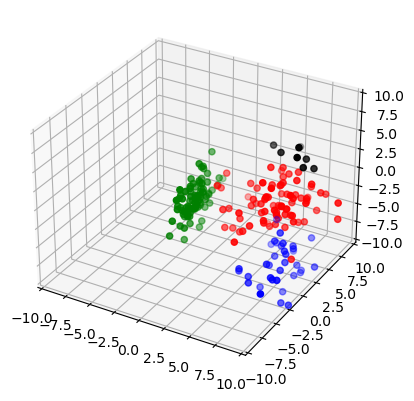

In [14]:
# setting plot parameters
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(left=-10,right=10)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(-10,10)
colors = ['red', 'green', 'blue', 'black']

X = np.zeros((1,4)) # create a container for storing the X data
X = X[1:]

'''
Generate 4 datasets from normal distributions in 3 dimensions
The normal ditributions for each dimension are generated from a random 
covariance matrix.

For each iteration,
Pick a random number of points [1,100] in
Assign them labels i. Concatenate the picked points with the labels
to create an augmented matrix of data and labels
'''
for i in range(0, 4):
    cov_matrix = cov_matrix_gen()
    mean = 20*np.random.rand(3) - 10 #pick a random 3 dimensional mean
    
    # create an random x distribution using the cov_matrix
    x = np.random.multivariate_normal(mean, cov_matrix, 100)
    
    rand_num_pts = np.random.randint(0, 101) #pick a random number of points
    x = np.concatenate((x,i*np.ones((100,1))),axis=1) #concatenate pts with labels
    X = np.concatenate((X,x)) # add X dataset repo
    
    # plotting step
    ax.scatter3D(x[0:rand_num_pts+1,0], x[0:rand_num_pts+1,1], x[0:rand_num_pts+1,2], color=colors[i])

plt.savefig('csc792_assignment1_data')

### Creating and Training the Model

In [15]:
'''
Network Architecture
'''
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(4, activation="softmax")
])

In [16]:
'''
Compiling the model
'''
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
'''
Preparing the data
'''
np.random.shuffle(X)
train_data = X[0:300, 0:3]
train_labels = X[0:300, 3]

test_data = X[300:, 0:3]
test_labels = X[300:, 3]

In [18]:
'''
Training the model
'''
model.fit(train_data, train_labels, epochs=10, batch_size=128)

Epoch 1/10
3/3 [==============================] - 1s 3ms/step - loss: 1.4584 - accuracy: 0.2733
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.8037 - accuracy: 0.6033
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.9200
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.9733
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.3563 - accuracy: 0.9800
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.9733
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.9733
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.9800
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9833
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9733


### Accuracy for the whole data set

In [19]:
pred_data = X[:, 0:3]
pred_labels = X[:, 3]
predictions = model.predict(pred_data)
predictions = predictions.argmax(axis=1)

13/13 [==============================] - 0s 1ms/step


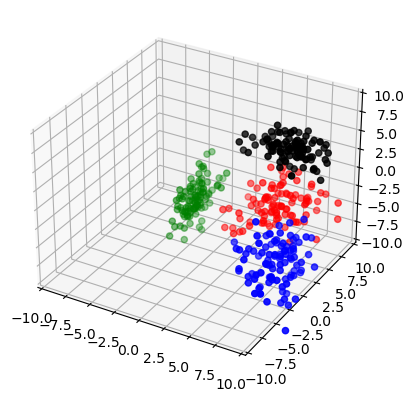

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(left=-10,right=10)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(-10,10)
colors = ['red', 'green', 'blue', 'black']
ax.scatter3D(pred_data[:,0], pred_data[:,1], pred_data[:,2], c=predictions, cmap=cm.colors.ListedColormap(colors))

plt.savefig('csc792_assignment1_predictions')

In [21]:
pres_loss, pred_acc = model.evaluate(pred_data, pred_labels)
print(f"test_acc: {pred_acc}")

13/13 [==============================] - 0s 2ms/step - loss: 0.1873 - accuracy: 0.9750
test_acc: 0.9750000238418579


In [22]:
pred_labels = np.reshape(pred_labels, predictions.shape)
pred_labels = np.asarray(pred_labels, dtype = 'int')

In [23]:
acc = predictions == pred_labels
acc_sum = np.sum(acc)
accuracy = acc_sum*100.0 / X.shape[0]
accuracy

97.5

### Accuracy for test data 

In [24]:
predictions = model.predict(test_data)
predictions = predictions.argmax(axis=1)

4/4 [==============================] - 0s 2ms/step


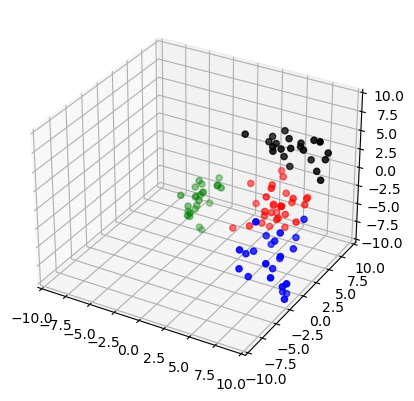

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(left=-10,right=10)
ax.set_ylim3d(-10,10)
ax.set_zlim3d(-10,10)
colors = ['red', 'green', 'blue', 'black']
ax.scatter3D(test_data[:,0], test_data[:,1], test_data[:,2], c=predictions, cmap=cm.colors.ListedColormap(colors))

plt.savefig('csc792_assignment1_predictions_test')

In [26]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"test_acc: {test_acc}")

4/4 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9500
test_acc: 0.949999988079071


In [27]:
test_labels = np.reshape(test_labels, predictions.shape)
test_labels = np.asarray(test_labels, dtype = 'int')
acc = predictions == test_labels
acc_sum = np.sum(acc)
accuracy = acc_sum*100.0 / test_data.shape[0]
accuracy

95.0